# Market Microstruture project

## Javier Alejandro Fajardo López

### Paqueterías

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy.optimize import minimize

### Funciones

In [179]:
def Erlang(k, lamb, S):
    return (lamb**k) * (S**(k-1)) * np.exp(-lamb*S) / math.factorial(k-1)

def P_LB(Spreads):
    return np.maximum(0, 0.5 - 0.08 * Spreads)

def P_LS(Spreads):
    return np.maximum(0, 0.5 - 0.08 * Spreads)

def objective_function(x, S0, Pi,  k, lamb):
    A, B = x

    Total_revenue = ((1 - Pi) * (P_LB(A - S0) + (P_LS(S0 - B)* (S0 - B)))
                     - Pi * (quad(lambda S: (S - A) * Erlang(k, lamb, S), A, np.inf)[0]
                             + quad(lambda S: (B - S) * Erlang(k, lamb, S), 0, B)[0]))
    return -Total_revenue



    

### Distribución Erlang

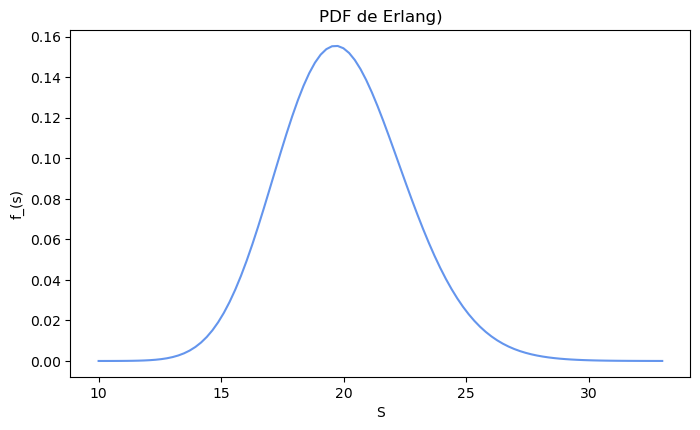

In [180]:
S = np.linspace(10, 33, 100)
k = 60
lamb = 3

plt.figure(figsize=(8,4.5))
plt.plot(S, Erlang(k, lamb, S), color='cornflowerblue')
plt.title(f'PDF de Erlang)')
plt.xlabel('S')
plt.ylabel('f_(s)')
plt.show()

### Expected Revenues

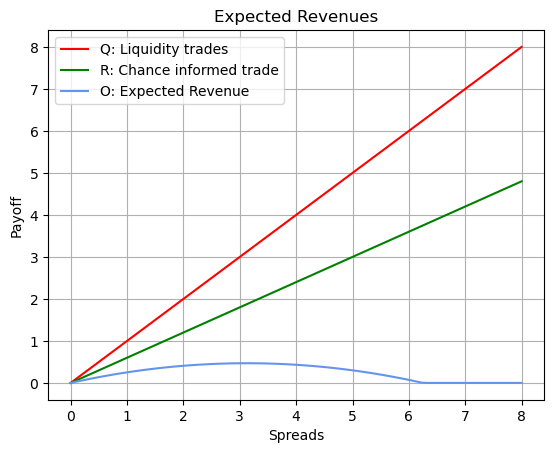

In [181]:
Spreads = np.linspace(0, 8, 100) 
Pi = 0.4

plt.plot(Spreads, Spreads, label='Q: Liquidity trades', color='red')
plt.plot(Spreads, (1-Pi)* Spreads , label='R: Chance informed trade', color='green')
plt.plot(Spreads,  P_LB(Spreads) * (1-Pi) * Spreads, label='O: Expected Revenue', color='cornflowerblue')

plt.title('Expected Revenues')
plt.xlabel('Spreads')
plt.ylabel('Payoff')
plt.grid()
plt.legend()
plt.show()


### Optimized Bid & Ask

In [185]:
S0 = 19.90
values = [25.0, 15.0]
optimized_BA = minimize(objective_function, values, args=(S0, Pi, k, lamb))
print('Optimal_Bid:', optimized_BA.x[1])
print('Optimal_Ask:', optimized_BA.x[0])







Optimal_Bid: 16.451643356395923
Optimal_Ask: 23.06802722432157
